In [1]:
using StaticArrays
using Plots
using LinearAlgebra

## Particle

In [6]:
struct Particle{Float64} <: FieldVector{2,Float64} # Julias måte å notere arv fra en datastruktur. Dette lar oss lagre alle partiklene en vektor
    x::Float64
    y::Float64
end

Particle(2.,1.)

2-element Particle{Float64} with indices SOneTo(2):
 2.0
 1.0

## Kreftene mellom partikler

## Forenkling av beregning ved bruk av grid 

![particle_grid](particle_grid.png)

In [7]:
using CellListMap

l = 20 # sidelengde
grid_size = 1
box = Box([l, l], grid_size)

Box{OrthorhombicCell, 2}
  unit cell matrix = [ 20.0 0.0; 0.0 20.0 ]
  cutoff = 1.0
  number of computing cells on each dimension = [23, 23]
  computing cell sizes = [1.0, 1.0] (lcell: 1)
  Total number of cells = 529

## Objekt for å holde følge på hvilken celle partiklene okkuperer

In [8]:
n_particles = 20
particles_demo = [rand(-l/2:l/2, 2) for _ in 1:n_particles]

cl = CellList(particles_demo, box)

CellList{2, Float64}
  20 real particles.
  18 cells with real particles.
  28 particles in computing box, including images.

## Plassering av partikler
Vi begynner med å plassere partiklene tilfeldig i boksen

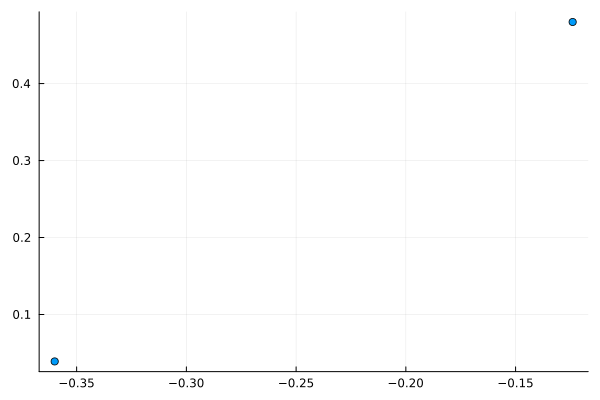

In [239]:
particles_inital_pos = [Particle(rand(-l/2:l/1000:l/2, 2)) for _ in 1:n_particles]


# function place_particles_random(N, l)
#     particles_inital_pos = SMatrix{2,N}(rand(-l/2))
#     for i in -l/2:N:l/2
#         for j in -l/2:N:l/2
#             particles_inital_pos[i,j] = [i, j]
#         end
#     end
    
    
#     return particles_inital_pos 
# end

scatter(particles_inital_pos[:][1], particles_inital_pos[:][2], label = false)

In [169]:
SMatrix{2,2}([2 2; 2 5])

2×2 SMatrix{2, 2, Int64, 4} with indices SOneTo(2)×SOneTo(2):
 2  2
 2  5

In [342]:
function random_vec(N, l)
    particles = [SVector{2}(rand(-l/2:l/N/100:l/2) for _ in 1:2) for _ in 1:N]
    return particles
end

N = 10
l = 1
p = random_vec(N, l)
for i in 1:length(p)
    scatter(p[i])
end


a = SMatrix{100,2}(1:200)
b = SMatrix{2,100}(1:200)

@time a[1,:]
@time b[:,1]

  0.000017 seconds (1 allocation: 32 bytes)
  0.000008 seconds (1 allocation: 32 bytes)


2-element SVector{2, Int64} with indices SOneTo(2):
 1
 2

In [389]:
a = MMatrix{2,5}(zeros(2,5))
a[:,1] = SVector{2}(rand(0:2), rand(0:2))
a

SMatrix{2,10}(rand(0:1, 2, 10))


a = SVector{10}([SVector{2}(rand(0:1, 2)) for _ in 1:10])

a[1] += [1,1]

ErrorException: setindex!(::SVector{10, SVector{2, Int64}}, value, ::Int) is not defined.
 Hint: Use `MArray` or `SizedArray` to create a mutable static array

In [99]:
a = zeros(200, 2)

for i in 1:200
    if norm(a[i,:]) == 0
        a[i,:] = ones(2)
    end
end
a

200×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 ⋮    
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0